In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
import psutil

sys.path.append("./scripts/")

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    import muon as mu
mu.set_options(display_style = "html", display_html_expand = 0b000);

In [2]:
%load_ext autoreload
%autoreload 2
from utils.interoperability import adata_to_mtx

# Load Data

In [41]:
file_path = "../data/qc_data/121c_adt_gex_qc.h5mu"
mdata = mu.read_h5mu(file_path)
mdata

/Users/djlisko/gitrepos/rhapsody-analysis-notebook/.venv/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Users/djlisko/gitrepos/rhapsody-analysis-notebook/.venv/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


adt:Cell_Type_Experimental,category,"Monocyte_classical,Monocyte_classical,Natural_kill..."
adt:Sample_Tag,category,"SampleTag12_hs,SampleTag07_hs,SampleTag03_hs,Sampl..."
adt:Sample_Name,category,"SampleTag12_hs,SampleTag07_hs,SampleTag03_hs,Sampl..."
adt:SampleTag01_hs_Read_Count,int64,"3,11,1,9,128,1,5,13,6,11,7,47,6,5,0,66,10,11,34,9,..."
adt:SampleTag02_hs_Read_Count,int64,"18,30,8,22,27,40,30,103,15,17,1,16,1,9,14,22,6,36,..."
adt:SampleTag03_hs_Read_Count,int64,"10,20,49,25,7286,23,19,24,10,29,12,39,0,4,2,6,1,17..."
adt:SampleTag04_hs_Read_Count,int64,"31,49,6,58,39,36,63,60,81,18,37,24,44,29,6,65,23,1..."
adt:SampleTag05_hs_Read_Count,int64,"3,13,5,1,17,0,20,25,3,10,5,2,4,18,16,43,11,1,1,3,4..."
adt:SampleTag06_hs_Read_Count,int64,"60,25,11,29,18,19,23,20,31,42,10,28,8,19,442,16,4,..."
adt:SampleTag07_hs_Read_Count,int64,"65,250,23,34,17,12,166,42,44,19,36,34,23,13,5,50,3..."
adt:SampleTag08_hs_Read_Count,int64,"8,16,12,40,130,26,13,241,8,24,111,7,20,19,15,15482..."


In [72]:
## Make Folders
fig_dir = "../figures/"

if not os.path.isdir(fig_dir):
    os.mkdir(fig_dir)

# Make Folder to save doublet figures
dblt_figs = os.path.join(fig_dir, "dblt_figs")

if not os.path.isdir(dblt_figs):
    os.mkdir(dblt_figs)

'../figures/dblt_figs'

In [42]:
import os

In [43]:
data_path = "../data/"
if "tmp" not in os.listdir(data_path):
    tmp_path =  os.path.join(data_path, "tmp")
    os.mkdir(tmp_path)
adata_to_mtx(mdata["gex"], dir_path="../data/")

File saved to ../data/


In [6]:
#TODO: I need to explain how this works

In [44]:
binomial_dev = pd.read_csv("../data/tmp/binomial.dev.csv", index_col=0)
binomial_dev.columns = binomial_dev.columns.str.replace(".", "_")
mdata["gex"].var = mdata["gex"].var.join(binomial_dev)

In [45]:
# Can Adjust this!
n_genes = 4000
idx = list(mdata["gex"].var.binomial_dev.argsort())[::-1][:n_genes]
mask = np.zeros(mdata["gex"].var_names.shape, dtype=bool)
mask[idx] = True
mdata["gex"].var["highly_deviant"] = mask
mdata["gex"].var["binomial_deviance"] = binomial_dev.binomial_dev

In [46]:
sc.pp.highly_variable_genes(
    mdata["gex"], 
    layer="log1p_norm",
    min_mean=0.0125, 
    max_mean=3,
    min_disp=0.5
)

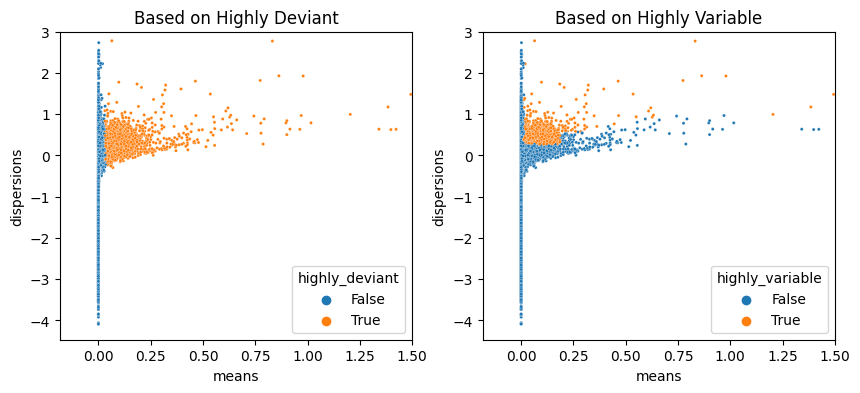

In [64]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

sns.scatterplot(
    data=mdata["gex"].var, x="means", y="dispersions", hue="highly_deviant", s=5,
    ax=axs[0]
)
axs[0].set_title("Based on Highly Deviant")
sns.scatterplot(
    data=mdata["gex"].var, x="means", y="dispersions", hue="highly_variable", s=5,
    ax=axs[1]
)
axs[1].set_title("Based on Highly Variable")
for ax in axs:
    ax.set_xlim(None, 1.5)
    ax.set_ylim(None, 3)

plt.show()

fig.savefig("../figures/dblt_figs/dispers_vs_means.png", transparent=True)
fig.savefig("../figures/dblt_figs/dispers_vs_means.svg", transparent=True)

# Dimensionalty Reduction

## PCA

## Preprocessing steps before running PCA

In [48]:
# Choose parameter for highly_variable
highly_var = "highly_variable"

mdata["gex"].layers["raw"] = mdata["gex"].X.copy()
mdata["gex"].X = mdata["gex"].layers["log1p_norm"].copy()

mdata["gex"].var["highly_variable"] = mdata["gex"].var[highly_var]
adata_hv = mdata["gex"][: ,mdata["gex"].var[highly_var]].copy()

In [49]:
num_processors = psutil.cpu_count(logical=False)
sc.pp.regress_out(adata_hv, ["pct_counts_mt", "total_counts"], n_jobs=num_processors)

#scales the data in the AnnData object so that each gene has a mean of zero and a standard deviation of one. 
# This standardization is a common preprocessing step, and it ensures that each gene has equal weight..
sc.pp.scale(
    adata_hv, 
    max_value=10 # caps the maximum value after scaling. This helps limit the impact of extreme outliers.
)

### Perform PCA

In [50]:
# setting highly variable as highly deviant to use scanpy 'use_highly_variable' argument in sc.pp.pca
sc.tl.pca(adata_hv, svd_solver="arpack", n_comps=50, use_highly_variable=True)

In [51]:
def plot_pc_rank(adata, n_pcs=20):
    plt.figure(figsize=(10, 3))

    log_var_ratio = np.log(adata.uns["pca"]["variance_ratio"])

    sns.scatterplot(log_var_ratio, s=30, edgecolor="black")
    plt.vlines(x=[i for i in range(len(log_var_ratio))], 
               ymin=min(log_var_ratio), 
               ymax=log_var_ratio, 
               color="grey", 
               zorder=-1,
               alpha=0.5
              )
    plt.vlines(x=n_pcs, color="r", ymin=min(log_var_ratio), ymax=max(log_var_ratio), linestyle="--")
    plt.ylabel("Log Variance Ratio")
    plt.xlabel("PC Rank")

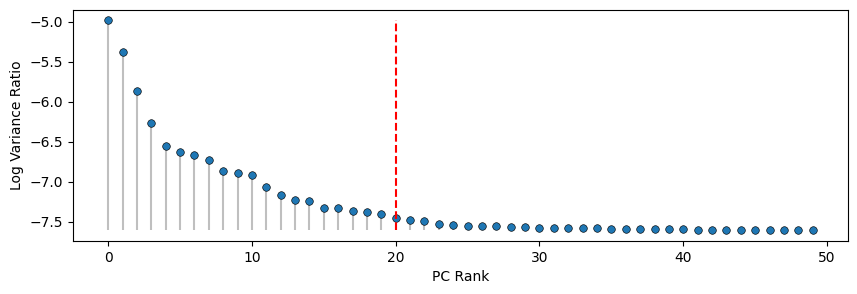

In [63]:
n_pcs=20 # Number of PCs for Donstream Clustering.
plot_pc_rank(adata_hv, n_pcs=n_pcs)

/Users/djlisko/gitrepos/rhapsody-analysis-notebook/.venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


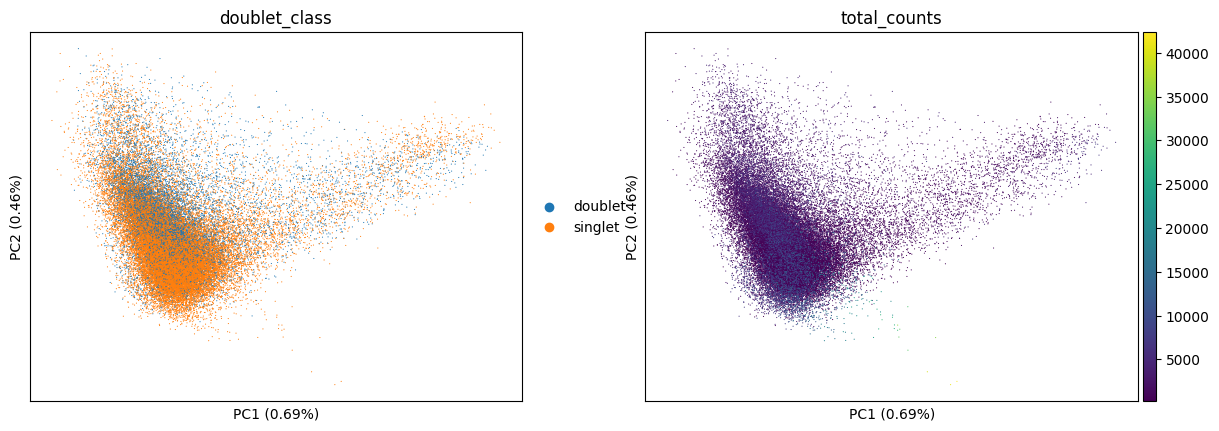

In [55]:
sc.pl.pca_scatter(adata_hv, color=["doublet_class", "total_counts"], annotate_var_explained=True)

## UMAP

/Users/djlisko/gitrepos/rhapsody-analysis-notebook/.venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
/Users/djlisko/gitrepos/rhapsody-analysis-notebook/.venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
/Users/djlisko/gitrepos/rhapsody-analysis-notebook/.venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
/Users/djlisko/gitrepos/rhapsody-analysis-notebook/.venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


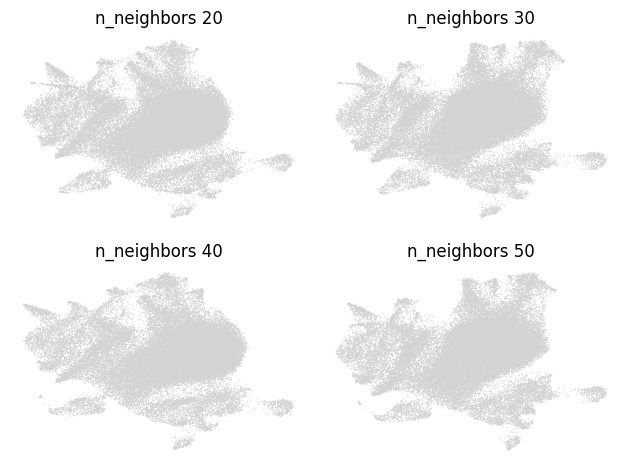

In [67]:
np.random.seed(42)
fig, axs = plt.subplots(ncols=2, nrows=2)
axs = axs.flatten()

neighbors_itr = range(20, 60, 10)

for n, ax in zip(neighbors_itr, axs):
    sc.pp.neighbors(adata_hv, n_pcs=n_pcs, n_neighbors=n)
    umap_res = sc.tl.umap(adata_hv, copy=True)
    sc.pl.umap(umap_res, frameon=False, title=f"n_neighbors {n}", show=False, ax=ax)

fig.tight_layout()

In [68]:
np.random.seed(42)
n_neighbors = 10
sc.pp.neighbors(adata_hv, n_pcs=n_pcs, n_neighbors=n_neighbors)
sc.tl.umap(adata_hv)

### Inspecting quality control metrics

In [69]:
#### Move up one resolution of  cells

In [70]:
adata_hv.obs["exp_cell_l1"] = ["_".join(cell) if "Natural" in cell else cell[0] for cell in adata_hv.obs.Cell_Type_Experimental.str.split("_") ]

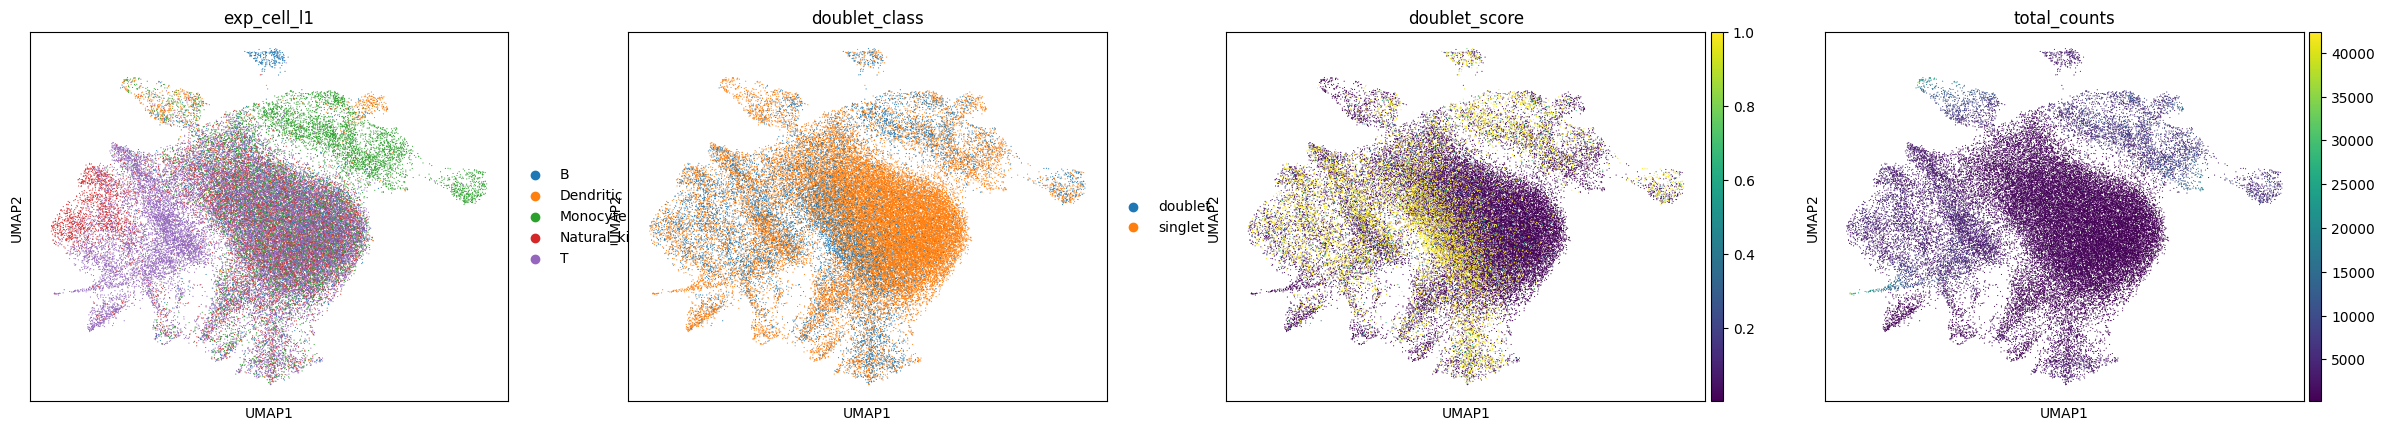

In [78]:
colors = ["exp_cell_l1", "doublet_class", "doublet_score", "total_counts"]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    axes = sc.pl.umap(adata_hv,
                     color=["exp_cell_l1", "doublet_class", "doublet_score", "total_counts"],
                     show=False
              )

    umap_dir = os.path.join(dblt_figs, "umaps")

    if not os.path.isdir(umap_dir):
        os.mkdir(umap_dir)

    # for color, ax in zip(colors, axes):
    plt.savefig(os.path.join(umap_dir, f"umap_qc_{'_'.join(colors)}"))

## Remove Doublets

In [32]:
doublets = (adata_hv.obs["doublet_class"] == "doublet") & (adata_hv.obs["doublet_score"] >= 0.8)
adata_hv = adata_hv[~doublets, ].copy()

### Recluster

In [33]:
sc.tl.pca(adata_hv, svd_solver="arpack", n_comps=50, use_highly_variable=True)

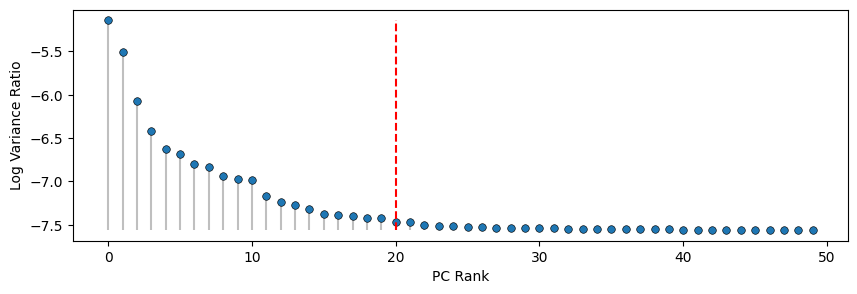

In [34]:
n_pcs=20 # Number of PCs for Donstream Clustering.
plot_pc_rank(adata_hv, n_pcs=n_pcs)

/Users/djlisko/gitrepos/rhapsody-analysis-notebook/.venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


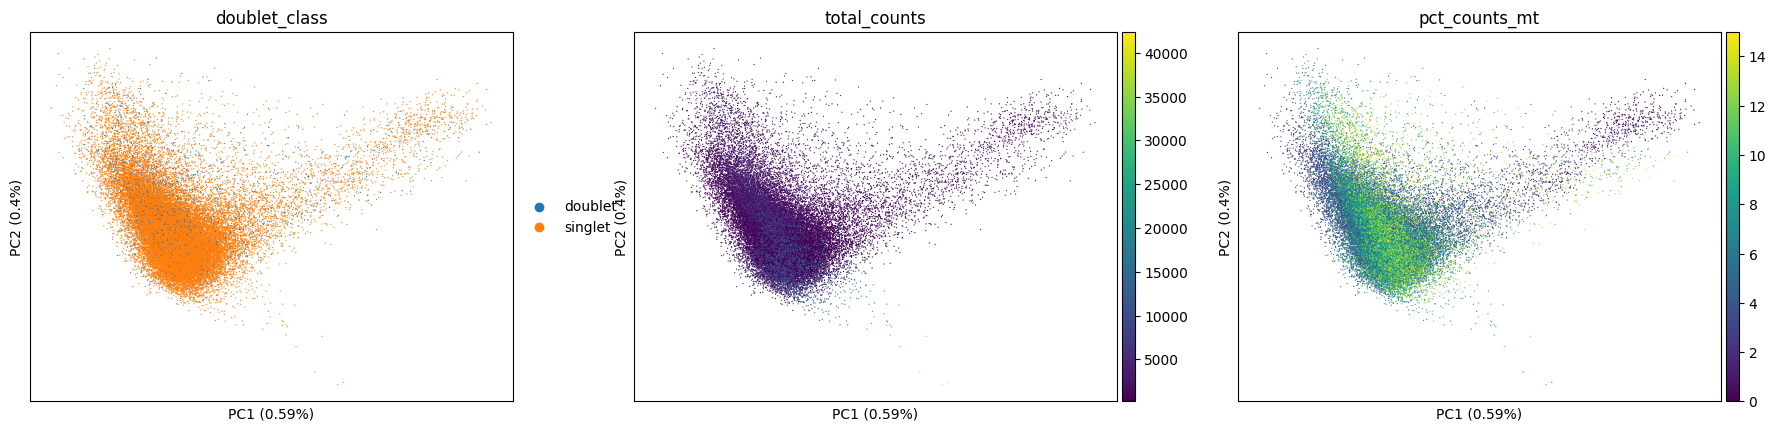

In [40]:
sc.pl.pca_scatter(adata_hv, color=["doublet_class", "total_counts", "pct_counts_mt"], annotate_var_explained=True)


In [ ]:
mdata.write_h5mu("../data/qc_data/121c_dblt_rm.h5mu")